Лабораторная работа №5 “Метод опорных векторов”
=====
Лабораточная работа выполнена на языке **Python** c помощью интерактивной оболочки **Jupyter Notebook**
Исходный код работы - lab5.py.
Файл jupyter notebook - lab5.ipynb

Набор данных ex5data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные являются линейно разделимыми.
Набор данных ex5data2.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные являются нелинейно разделимыми.
Набор данных ex5data3.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные разделены на две выборки: обучающая выборка (X, y), по которой определяются параметры модели; валидационная выборка (Xval, yval), на которой настраивается коэффициент регуляризации и параметры Гауссового ядра.
Набор данных spamTrain.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X - вектор, кодирующий отсутствие (0) или присутствие (1) слова из словаря vocab.txt в письме, и y - метка класса: 0 - не спам, 1 - спам. Набор используется для обучения классификатора.
Набор данных spamTest.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные Xtest - вектор, кодирующий отсутствие (0) или присутствие (1) слова из словаря vocab.txt в письме, и ytest - метка класса: 0 - не спам, 1 - спам. Набор используется для проверки качества классификатора.

## Ход работы

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io
import matplotlib.image as mpimg
import os

### Загрузите данные ex5data1.mat из файла.

In [3]:
data = scipy.io.loadmat('ex5data1.mat')
X = data['X']
y = np.squeeze(data['y'])

### Постройте график для загруженного набора данных: по осям - переменные X1, X2, а точки, принадлежащие различным классам должны быть обозначены различными маркерами.

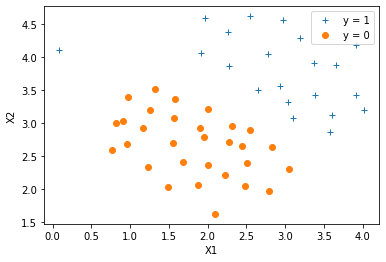

In [7]:
plt.figure()
plt.plot(X[y == 1, 0], X[y == 1, 1], '+')
plt.plot(X[y == 0, 0], X[y == 0, 1], 'o')
plt.ylabel('X2')
plt.xlabel('X1')
plt.legend(('y = 1', 'y = 0'))
plt.show()

### Обучите классификатор с помощью библиотечной реализации SVM с линейным ядром на данном наборе.

In [8]:
from sklearn import svm

clf = svm.LinearSVC()
clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### Постройте разделяющую прямую для классификаторов с различными параметрами C = 1, C = 100 (совместно с графиком из пункта 2). Объясните различия в полученных прямых?

In [14]:
def plot_decision_boundary(clf, C=1):
    plt.figure()
    plt.plot(X[y == 1, 0], X[y == 1, 1], '+')
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'o')
    X_1, X_2 = np.meshgrid(np.linspace(X[:, 0].min(),X[:, 0].max(), num=100), np.linspace(X[:, 1].min(), X[:, 1].max(), num=100))
    plt.contour(X_1, X_2, clf.predict(np.array([X_1.ravel(), X_2.ravel()]).T).reshape(X_1.shape), 1, colors="b")
    plt.ylabel('X2')
    plt.xlabel('X1')
    plt.legend(('y = 1', 'y = 0'))
    plt.title(f'Descision boundary with C = {C}')
    plt.show()

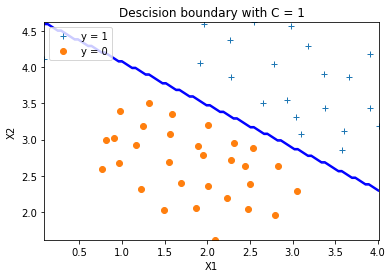

In [15]:
plot_decision_boundary(clf)

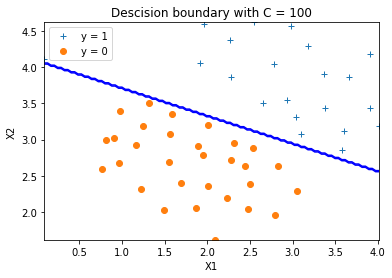

In [19]:
clf = svm.LinearSVC(C=100, max_iter=100000)
clf.fit(X, y)
plot_decision_boundary(clf, C=100)

При С = 100 разделяющая граница проходит намного ближе к значениям параметром, что говорит о переобученой модели, которая может показывать не лучший результат в кросс-валидации, при С = 1 наоборот остается зазор между значениями и разделяющей прямой, что говорит о более общей границе значений и такая модель должна лучше себя показывать на кросс-валидации.

### Реализуйте функцию вычисления Гауссового ядра для алгоритма SVM.

In [20]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2)))

def gaussian_kernel_gram_matrix(X, L, sigma, K_function=gaussian_kernel):
    gram_matrix = np.zeros((X.shape[0], L.shape[0]))
    for i, x in enumerate(X):
        for j, l in enumerate(L):
            gram_matrix[i, j] = K_function(x, l, sigma)
    return gram_matrix

### Загрузите данные ex5data2.mat из файла. Обработайте данные с помощью функции Гауссового ядра. Обучите классификатор SVM. Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).

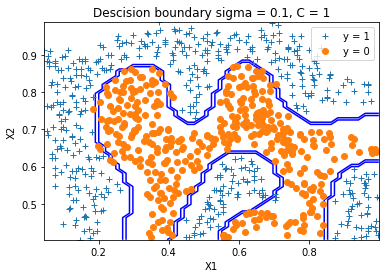

In [21]:
data = scipy.io.loadmat('ex5data2.mat')
X = data['X']
y = np.squeeze(data['y'])

L = X
sigma = 0.1
gram = gaussian_kernel_gram_matrix(X, L, sigma)
clf = svm.SVC(kernel="precomputed") # kernel=gaussian_kernel, gamma=1
clf.fit(gram, y)

plt.figure()
plt.plot(X[y == 1, 0], X[y == 1, 1], '+')
plt.plot(X[y == 0, 0], X[y == 0, 1], 'o')
X_1, X_2 = np.meshgrid(np.linspace(X[:, 0].min(),X[:, 0].max(), num=50), np.linspace(X[:, 1].min(), X[:, 1].max(), num=50))
X_plot = np.array([X_1.ravel(), X_2.ravel()]).T
gram_plot = gaussian_kernel_gram_matrix(X_plot, L, sigma)
Z = clf.predict(gram_plot).reshape(X_1.shape)
plt.contour(X_1, X_2, Z, 1, colors="b")
plt.ylabel('X2')
plt.xlabel('X1')
plt.legend(('y = 1', 'y = 0'))
plt.title(f'Descision boundary sigma = 0.1, C = 1')
plt.show()

### Загрузите данные ex5data3.mat из файла. Вычислите параметры классификатора SVM на обучающей выборке, а также подберите параметры C и σ2 на валидационной выборке. Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).

In [23]:
def cross_validate(X, y, X_val, y_val):
    C_array = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    sigma_array = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    err_array = np.zeros([C_array.size, sigma_array.size])
    for i in np.arange(C_array.size):
        for j in np.arange(sigma_array.size):
            sigma = sigma_array[j]
            C = C_array[i]
            gram = gaussian_kernel_gram_matrix(X, X, sigma)
            clf = svm.SVC(C=C, kernel="precomputed")
            clf.fit(gram, y)
            predictions = clf.predict(gaussian_kernel_gram_matrix(X_val, X, sigma))
            pred_error = np.mean(predictions != y_val)

            err_array[i, j] = pred_error

    ind = np.unravel_index(np.argmin(err_array, axis=None), err_array.shape)
    C = C_array[ind[0]]
    sigma = sigma_array[ind[1]]
    return C, sigma

In [24]:
data = scipy.io.loadmat('ex5data3.mat')
X = data['X']
y = np.squeeze(data['y'])
X_val = data['Xval']
y_val = np.squeeze(data['yval'])

In [25]:
C, sigma = cross_validate(X, y, X_val, y_val)
print(f'Best fit on cross-validation with C = {C}, sigma = {sigma}')

Best fit on cross-validation with C = 1.0, sigma = 0.1


In [26]:
gram = gaussian_kernel_gram_matrix(X, X, sigma)
clf = svm.SVC(C=C, kernel="precomputed")
clf.fit(gram, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

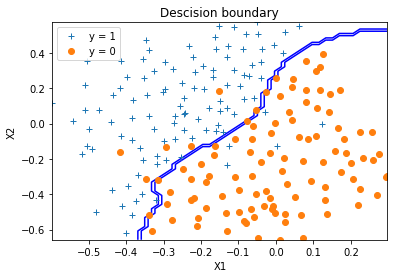

In [27]:
plt.figure()
plt.plot(X[y == 1, 0], X[y == 1, 1], '+')
plt.plot(X[y == 0, 0], X[y == 0, 1], 'o')
X_1, X_2 = np.meshgrid(np.linspace(X[:, 0].min(),X[:, 0].max(), num=50), np.linspace(X[:, 1].min(), X[:, 1].max(), num=50))
X_plot = np.array([X_1.ravel(), X_2.ravel()]).T
gram_plot = gaussian_kernel_gram_matrix(X_plot, X, sigma)
Z = clf.predict(gram_plot).reshape(X_1.shape)
plt.contour(X_1, X_2, Z, 1, colors="b")
plt.ylabel('X2')
plt.xlabel('X1')
plt.legend(('y = 1', 'y = 0'))
plt.title(f'Descision boundary')
plt.show()

### Загрузите данные spamTrain.mat из файла. Обучите классификатор SVM. Загрузите данные spamTest.mat из файла. Подберите параметры C и σ2.

In [66]:
spam_train = scipy.io.loadmat('spamTrain.mat')
X = spam_train['X']
y = np.squeeze(spam_train['y'])
spam_test = scipy.io.loadmat('spamTest.mat')
X_test = spam_test['Xtest']
y_test = np.squeeze(spam_test['ytest'])

In [59]:
def spam_cross_validation(X, y, X_val, y_val):
    C_array = np.array([0.01, 0.1, 0.3, 1, 10])
    err_array = np.zeros(C_array.size)

    for i in np.arange(C_array.size):
        C = C_array[i]
        clf = svm.SVC(C=C, kernel="linear")
        clf.fit(X, y)
        predictions = clf.predict(X_val)
        pred_error = np.mean(predictions != y_val)

        err_array[i] = pred_error

    ind = np.unravel_index(np.argmin(err_array, axis=None), err_array.shape)
    C = C_array[ind[0]]
    return C

In [60]:
C = spam_cross_validation(X, y, X_test, y_test)
print(f'Best C on cross-validation: {C}')

Best C on cross-validation: 0.1


In [61]:
clf = svm.SVC(C=C, kernel='linear')
clf.fit(X, y)
print(f'Training set accuracy: {clf.score(X, y) * 100:10.4}%')
print(f'Test set accuracy: {clf.score(X_test, y_test) * 100:10.4}')

Training set accuracy:      99.83%
Test set accuracy:       98.9


Линейное ядро для SVM показало себя лучше в результатах предсказания и скорости работы чем гаусовское ядро.

### Реализуйте функцию предобработки текста письма

In [65]:
import re
from nltk.stem import PorterStemmer

def preprocess_data(data):
    result = data.lower()
    result = re.sub(r'<.*?>', '', result)
    result = re.sub(r'[http|https]://[^\s]*', 'httpaddr', result)
    result = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', result)
    result = re.sub(r'[0-9]+', ' number ', result)
    result = re.sub(r'[$]+', ' dollar ', result)
    result = re.sub(r'[^a-zA-Z\s]+', ' ', result)
    result = result.replace('\n', ' ')
    ps = PorterStemmer()
    result = [ps.stem(token) for token in result.split(" ")]
    result = " ".join(result)
    return result

### Загрузите коды слов из словаря vocab.txt.

In [62]:
vocab_data = open("vocab.txt","r").read().split("\n")[:-1]
vocab = {}
for elem in vocab_data:
    index, word = elem.split('\t')[:]
    vocab[word] = index

### Реализуйте функцию замены слов в тексте письма после предобработки на их соответствующие коды.

In [36]:
def map_to_vocabulary(data, vocab):
    result = []
    for word in data.split():
        if len(word) > 1 and word in vocab:
            result.append(int(vocab[word]))

    return result

### Реализуйте функцию преобразования текста письма в вектор признаков

In [37]:
def map_feature(data, vocab):
    n = len(vocab)
    features = np.zeros((n,))
    for i in data:
        features[i] = 1

    return features

In [38]:
def generate_feature(data, vocab):
    preprocessed = preprocess_data(data)
    word_indexes = map_to_vocabulary(preprocessed, vocab)
    feature = map_feature(word_indexes, vocab)
    return feature

### Проверьте работу классификатора на письмах из файлов emailSample1.txt, emailSample2.txt, spamSample1.txt и spamSample2.txt.

In [63]:
def predict_from_files(files, vocab, clf):
    features = []
    for file in files:
        feature = generate_feature(open(file, "r").read(), vocab)
        features.append(feature)

    features = np.array(features)
    result = clf.predict(features)
    return zip(files, result)

In [67]:
files = ['emailSample1.txt', 'emailSample2.txt', 'spamSample1.txt', 'spamSample2.txt']
preds = predict_from_files(files, vocab, clf)
for pred in preds:
    isSpam = 'not spam' if pred[1] == 0 else 'spam'
    print(f'Prediction for data from file {pred[0]} is {isSpam}')

Prediction for data from file emailSample1.txt is not spam
Prediction for data from file emailSample2.txt is not spam
Prediction for data from file spamSample1.txt is spam
Prediction for data from file spamSample2.txt is spam


### Создайте свой набор данных из оригинального корпуса текстов - http://spamassassin.apache.org/old/publiccorpus/.

In [68]:
X_data = []
ham_dir = 'data/ham/'
files = os.listdir(ham_dir)
for file_name in files:
    if file_name == '.DS_Store': continue
    with open(ham_dir + file_name, 'r') as f:
        try:
            X_data.append(f.read())
        except:
            continue

y_ham = np.zeros(len(X_data))
spam_dir = 'data/spam/'
files = os.listdir(spam_dir)
for file_name in files:
    if file_name == '.DS_Store': continue
    with open(spam_dir + file_name, 'r') as f:
        try:
            X_data.append(f.read())
        except:
            continue

y_spam = np.ones(len(X_data) - len(y_ham))
y = np.concatenate((y_ham, y_spam))
print(f'Size of data set: {y.size}')

Size of data set: 3049


### Постройте собственный словарь.

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import  train_test_split

X_vocab = []
for data in X_data[100:]:
    X_vocab.append(preprocess_data(data))

vectorizer = CountVectorizer()
vectorizer.fit(X_vocab)
n = 1000
vocab = {}
index = 0
for word in vectorizer.vocabulary_:
    vocab[word] = index
    index += 1
    if index >= n:
        break

In [70]:
# generating new input features
X = []
for data in X_data:
    feature = generate_feature(data, vocab)
    X.append(feature)

X = np.array(X)

In [71]:
# split data on test/train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
# train SVC classificator
C = 0.1
clf = svm.SVC(C=C, kernel='linear')
clf.fit(X_train, y_train)
print(f'Training set accuracy: {clf.score(X, y) * 100:10.4}%')
print(f'Test set accuracy: {clf.score(X_test, y_test) * 100:10.4}')

Training set accuracy:      99.77%
Test set accuracy:      98.85


In [74]:
files = ['emailSample1.txt', 'emailSample2.txt', 'spamSample1.txt', 'spamSample2.txt']
preds = predict_from_files(files, vocab, clf)
for pred in preds:
    isSpam = 'not spam' if pred[1] == 0 else 'spam'
    print(f'Prediction for data from file {pred[0]} is {isSpam}')

Prediction for data from file emailSample1.txt is not spam
Prediction for data from file emailSample2.txt is not spam
Prediction for data from file spamSample1.txt is spam
Prediction for data from file spamSample2.txt is spam


Взяв новый набор данных из оригинального корпуса текстов (http://spamassassin.apache.org/old/publiccorpus/) и построив достаточно большой словарь получили приблизильно одинаковые результаты по сравнению с созданным набором признаков.
Резальтаты почти не отличаются потому что размер набора данных и словаря достаточно велик, а на тексковыми данными производятся теже процедуры обработки.

## Вывод
В данной работе было показано постоения модели метода опорных вектором, построен классификатор на основе этого метода, показано влияние параметров регуляризации C и σ2 на классификатор. Построен классификатор спама для уже созданого набора признаков и постоен набор признаков из отдельного корпуса текстов со своим словарем.